In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
df_pop = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_total--by--geo--time.csv')
df_pop.head(n=3)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000


In [4]:
df_gdp = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv')
df_gdp.head(n=3)

,geo,time,gdppercapita_us_inflation_adjusted
0,abw,2010,24271.94042
1,afg,2002,364.57057
2,afg,2003,376.75871


In [5]:
df_life = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
df_life.head(n=3)

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42


In [6]:
df_child = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
df_child.head(n=3)

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born
0,abw,1950,109.309
1,abw,1951,105.483
2,abw,1952,98.120


In [7]:
df_geo = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')[['country', 'world_6region']]
df_geo = df_geo.rename(columns={'country': 'geo'})
df_geo.head(n=3)

,geo,world_6region
0,abkh,europe_central_asia
1,abw,america
2,afg,south_asia


In [8]:
df = df_pop.merge(df_gdp).merge(df_life).merge(df_child).merge(df_geo)
df.head(n=3)

,geo,time,population_total,gdppercapita_us_inflation_adjusted,life_expectancy_years,child_mortality_0_5_year_olds_dying_per_1000_born,world_6region
0,afg,2002,21979923,364.57057,52.43,122.2,south_asia
1,afg,2003,23064851,376.75871,53.03,118.3,south_asia
2,afg,2004,24118979,364.09544,53.50,114.4,south_asia


# correlation

In [9]:
import numpy as np
def weighted_corr(x, y, w):
    def weighted_mean(x, w):
        return np.sum(x*w) / np.sum(w)
    def weighted_cov(x, y, w):
        mean_x = weighted_mean(x, w)
        mean_y = weighted_mean(y, w)
        return np.sum(w * (x - mean_x) * (y - mean_y)) / np.sum(w)
    a = weighted_cov(x, y, w)
    b = weighted_cov(x, x, w)
    c = weighted_cov(y, y, w)
    return a / np.sqrt(b *c)

In [10]:
times = sorted(set(df.time))
regions = list(set(df.world_6region))

In [11]:
def plot_for(col_a, col_a_name, col_b, col_b_name):
    records = {region: [] for region in df.world_6region}
    for time in times:
        df_time = df[df.time == time]
        for region in regions:
            df_reg = df_time[df_time.world_6region == region]
            cor = weighted_corr(df_reg[col_a], df_reg[col_b], df_reg.population_total)
            records[region].append(cor)
    for region in regions:
        plt.plot(times, records[region])
    plt.title('Correlation between {} and {}'.format(col_a_name, col_b_name))
    plt.ylim(-1, 1)
    plt.legend(regions)

In [12]:
save_dir = Path('output')

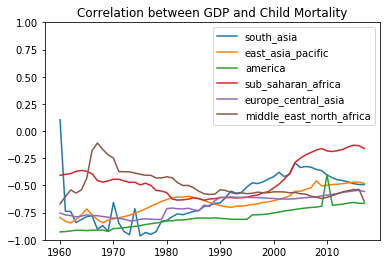

In [13]:
plot_for('gdppercapita_us_inflation_adjusted', 'GDP',
         'child_mortality_0_5_year_olds_dying_per_1000_born', 'Child Mortality')
plt.savefig(save_dir / 'gdp_vs_child_mortality')

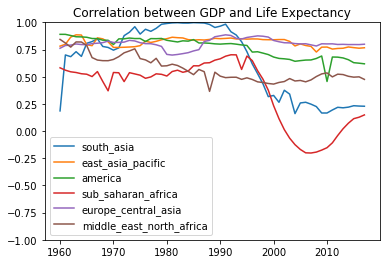

In [14]:
plot_for('gdppercapita_us_inflation_adjusted', 'GDP',
         'life_expectancy_years', 'Life Expectancy')
plt.savefig(save_dir / 'gdp_vs_life_expectancy')

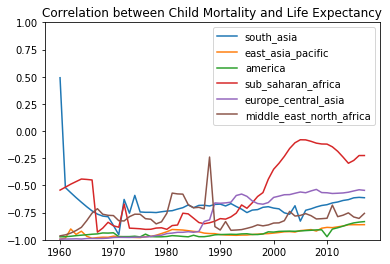

In [15]:
plot_for('child_mortality_0_5_year_olds_dying_per_1000_born', 'Child Mortality',
         'life_expectancy_years', 'Life Expectancy')
plt.savefig(save_dir / 'child_mortality_vs_life_expectancy_years')

# supplemental plot

In [16]:
df['child_mortality_0_5_year_olds_dying'] = df['child_mortality_0_5_year_olds_dying_per_1000_born'] / 1000

In [17]:
def plot_for2(col, col_name):
    records = {region: [] for region in df.world_6region}
    for time in times:
        df_time = df[df.time == time].copy()
        df_time['tmp_total'] = df_time[col] * df_time['population_total']
        df_grouped = df_time.groupby('world_6region').sum()
        df_grouped['tmp_avg'] = df_grouped['tmp_total'] / df_grouped['population_total']
        for region in regions:
            records[region].append(df_grouped.loc[region]['tmp_avg'])
    for region in regions:
        plt.plot(times, records[region])
    plt.title('{}'.format(col_name))
    plt.legend(regions)

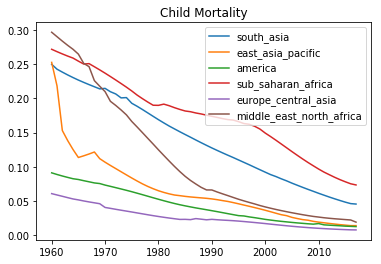

In [18]:
plot_for2('child_mortality_0_5_year_olds_dying', 'Child Mortality')
plt.savefig(save_dir / 'child_mortality')

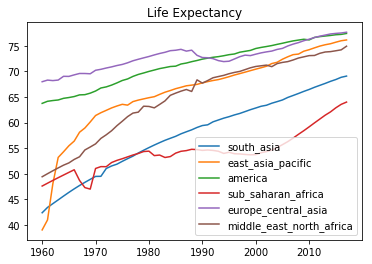

In [19]:
plot_for2('life_expectancy_years', 'Life Expectancy')
plt.savefig(save_dir / 'life_expectancy_years')

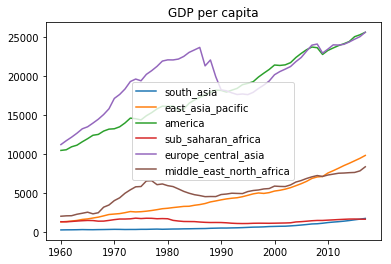

In [20]:
plot_for2('gdppercapita_us_inflation_adjusted', 'GDP per capita')
plt.savefig(save_dir / 'GDP')

In [21]:
df.columns

Index(['geo', 'time', 'population_total', 'gdppercapita_us_inflation_adjusted',
       'life_expectancy_years',
       'child_mortality_0_5_year_olds_dying_per_1000_born', 'world_6region',
       'child_mortality_0_5_year_olds_dying'],
      dtype='object')

(0, 10000)

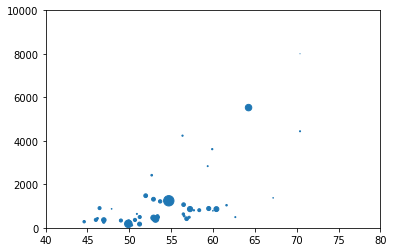

In [37]:
df15 = df[df.time == 1995]
dfsub = df15[df15.world_6region == 'sub_saharan_africa']
plt.scatter(dfsub.life_expectancy_years, dfsub.gdppercapita_us_inflation_adjusted, dfsub.population_total/1000000)
plt.xlim(40, 80)
plt.ylim(0, 10000)

(0, 10000)

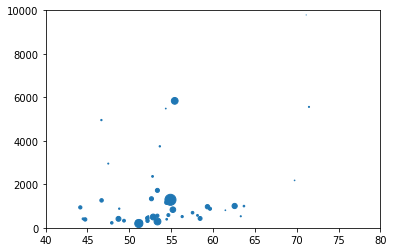

In [38]:
df15 = df[df.time == 2000]
dfsub = df15[df15.world_6region == 'sub_saharan_africa']
plt.scatter(dfsub.life_expectancy_years, dfsub.gdppercapita_us_inflation_adjusted, dfsub.population_total/1000000)
plt.xlim(40, 80)
plt.ylim(0, 10000)

(0, 10000)

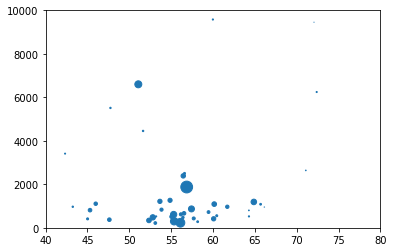

In [39]:
df15 = df[df.time == 2005]
dfsub = df15[df15.world_6region == 'sub_saharan_africa']
plt.scatter(dfsub.life_expectancy_years, dfsub.gdppercapita_us_inflation_adjusted, dfsub.population_total/1000000)
plt.xlim(40, 80)
plt.ylim(0, 10000)

(0, 10000)

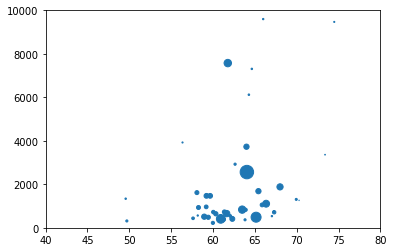

In [40]:
df15 = df[df.time == 2015]
dfsub = df15[df15.world_6region == 'sub_saharan_africa']
plt.scatter(dfsub.life_expectancy_years, dfsub.gdppercapita_us_inflation_adjusted, dfsub.population_total/1000000)
plt.xlim(40, 80)
plt.ylim(0, 10000)